EXES: Data inspection
================
* **Aim**: Extract grism data with a user-defined aperture. <br />
* **Data**: Level 3 grism data of the IK Tau. <br />
* **Tools**: astropy<br />
* **Instrument**: EXES<br />
* **Documentation**: [EXES data handbook](https://www.sofia.usra.edu/sites/default/files/USpot_DCS_DPS/Documents/EXES_GO-DataHandbook.pdf)
* **Notebook repository**: https://github.com/SOFIAObservatory/Recipes

Goals
-------
* Inspect EXES data structure
* Plot EXES spectrum

## Introduction

text

## Imports

In [1]:
from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# import fits file
file_name= '../example_data/EXES/hilo724cm-1/iktau_feb2020_MRD.fits'
hdu = fits.open(file_name)

## Data structure
The Level 4 EXES data products are returned in a 2D fits file with 4 axis accompanied by header inforamtion. The data axis are 
* [0] Wavenumber
* [1] flux
* [2] uncertainty
* [3] Default Default Atmospheric Transition (ATRAN) model

In [3]:
# fits file data structure
hdu[0].data.shape

(4, 45562)

In [4]:
# The header information 
hdu[0].header[0:30]

SIMPLE  =                    T / Written by IDL:  Tue Feb 18 11:53:08 2020      
BITPIX  =                  -64 /Real*8 (double precision)                       
NAXIS   =                    2 /                                                
NAXIS1  =                45562 /                                                
NAXIS2  =                    4 /                                                
ADDTIME =              172.385 / Effective on-source time                       
AIRSPEED=              489.125 / knots, aircraft airspeed das.ic1080...         
ALTI_END=              40011.0 / feet, aircraft altitude end fms.altitude)      
ALTI_STA=              40014.0 / feet, aircraft altitude start das.ic1080_1     
AOR_ID  = '06_0144_2'          / Astronomical Observation Request Identifie     
AOT_ID  = 'UNKNOWN '           / Astronomical Obervation Template               
ASSC_AOR= '06_0144_2'          / All input AOR-IDs                              
BB_TEMP =              273.1

The data axis are 0: Wavenumber, 1: flux, 2: uncertainty, 3: Default Atmospheric Transition (ATRAN) model

In [5]:
hdu[0].data

array([[ 7.01745789e+02,  7.01746643e+02,  7.01747559e+02, ...,
         7.42974792e+02,  7.42975708e+02,  7.42976624e+02],
       [-2.20898128e+00, -7.45479393e+00, -4.06299877e+00, ...,
         1.46986710e+02,  1.49695770e+02,  1.51306870e+02],
       [ 1.19618416e+01,  1.22323246e+01,  1.21103344e+01, ...,
         9.83231258e+00,  9.87648964e+00,  9.93135738e+00],
       [            nan,  7.64626384e-06,  1.20288569e-05, ...,
         9.18215811e-01,             nan,             nan]])

In [6]:
wavenumber = hdu[0].data[0]
flux_unit = u.erg * u.s**(-1) * (u.cm)**-2 * u.sr**(-1)
flux = hdu[0].data[1] * flux_unit
uncertainty = hdu[0].data[2] * flux_unit
atran = hdu[0].data[3]

## Flux units
The incidents counts on the EXES detector are processed and returned as a flux in erg s-1 cm-2 sr-1. The uncertainty is calculated similarly, yet is not as accurate as listed. Uncertainties are typically in the range of 20\%.

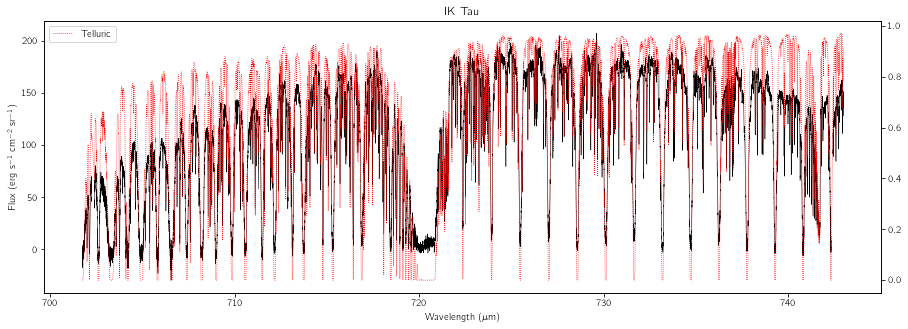

In [7]:
# Plot the whole spectrum
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(wavenumber, flux, lw=0.5, c='k')
ax2.plot(wavenumber, atran, lw=0.75, c='r', linestyle=':',label="Telluric")
ax1.set_ylabel(r'Flux (erg s$^{-1}$ cm$^{-2}$ sr$^{-1}$)')
ax1.set_xlabel(r'Wavelength ($\mu$m)')
plt.legend()
plt.title('IK Tau')
plt.show()

In [8]:
# Function to plot window of spectrum 
def plot_window(xmin, xmax):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()
    ax1.plot(wavenumber, flux, lw=0.5, c='k')
    ax2.plot(wavenumber, atran, lw=0.75, c='r', linestyle=':',label="Telluric")
    ax1.set_ylabel(r'Flux (erg s$^{-1}$ cm$^{-2}$ sr$^{-1}$)')
    ax1.set_xlabel(r'Wavelength ($\mu$m)')
    plt.xlim(xmin,xmax)
    plt.title('IK Tau')
    plt.show()
    

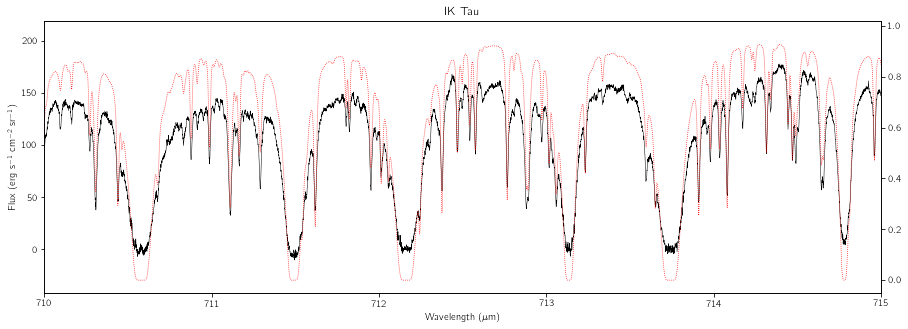

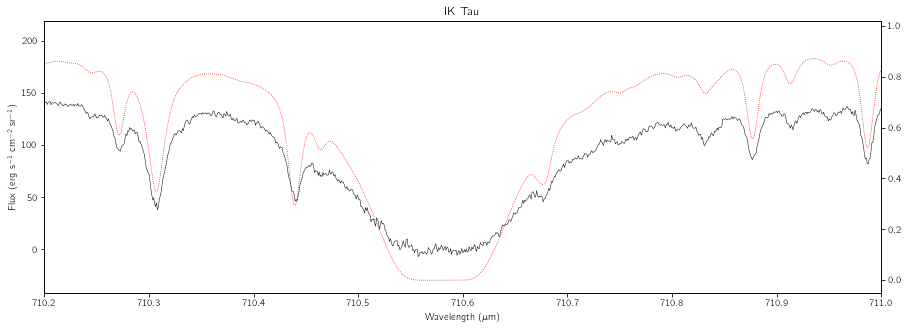

In [9]:
# Spectral window plots 
plot_window(710, 715)
plot_window(710.2, 711)

<!-- terlluric querying psg plantary spectrum generator (nasa goddard) -->

<!-- hitran (happy interface) and exmol atmospheric models geisa models -->

<!-- specutils -->

<!-- TEXES folks Colece Silyk (Texas austin) -->